# The Battle of Neighborhoods
### Best Chinese Restaurant in New York City
---
### 1. Introduction
#### 1.1 Background
New York is a city of superlatives: America's biggest; its most exciting; its business and cultural capitals; the nation's trendsetter.The city seems to pull in the best and the brightest from every corner of the country. The city's ethnic flavor has been nuanced by decades of immigrants whose first glimpse of America was the Statue of Liberty guarding New York Harbor and by large expatriate communities such as the United Nations headquartered there.  

New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers.  

New York City is experiencing a Chinese food renaissance. Never before have the city’s offerings been so diverse. Some even say that New York is living in what’s surely just the beginning of a golden age of Chinese food.

#### 1.2 Problem
Mr.Chan is a die-hard foodie coming from Singapore. With a Chinese background, he decides to spend his retire life as a Chinese restaurant owner in New York City.  

As a Data Science professor himself, he plans to make a proper analysis before he spends all of his lifetime savings. After all, opening a restaurant isn't as easy as a Cousera assignment. :)

#### 1.3 Interest
Based on his professional experience and data-sensitive mindset, Mr.Chan decides to focus on the following elements:
- Neighborhood with few Chinese restaurant
- Neighborhood with best rated Chinese food  
... and ultimately,
- The best place to open a Chinese restaurant in New York.

---
### 2. Data Acquisition and Wrangling
#### 2.1 Data Sources
As the restaurant will be located in New York City, the data we are going to use will also revolve around NYC.
#### 2.1.1 Data I:
We will use the New York City Geo Data from here: https://cocl.us/new_york_dataset  
![data1](https://github.com/jiahui-shen7/The-Battle-of-Neighborhoods/blob/master/data1.png?raw=true)
#### 2.1.2 Data II:
NYC geo-spacial data will be used and with the help of Folium map and Choropleth maps, it will be easier to understand the locations of various restaurants in NYC visually.  
![data2](tbc)  
Data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
#### 2.1.3 Data III:
Foursqaure is the last data source ([here](https://enterprise.foursquare.com/products/places)) we will be leveraging to obtain specific information about restaurants in different neighborhoods of NYC. The API requests will allow Mr.Chan to understand better the popularity of Chinese cuisine in NYC.  
#### Data Cleaning and Wrangling
- Fetch the data from the sources mentioned above
- Conduct specific requests to obtain relevant information about Chinese cuisines from Foursquare API
- Examine the ratings and reviews of popular Chinese restaurants
- Use Matplotlib and Folium to assist the analysis visually

---
### 3. Here begins the data analysis for Mr.Chan!
#### 3.1 Explore the neighborhood and restaurant
Import the dependencies.

In [5]:
import pandas as pd
import numpy as np
import requests
import os
import folium
from geopy.geocoders import Nominatim # For obtaining latitude and longitude

# Matplotlib and its functions
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Imported Libraries.')

Imported Libraries.


Create a function to retrieve data from Data I.

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [7]:
nyc = get_new_york_data()
nyc.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
nyc.shape

(306, 4)

In [9]:
nyc[nyc["Neighborhood"]=="Manhattan Beach"]

,Borough,Neighborhood,Latitude,Longitude
77,Brooklyn,Manhattan Beach,40.577914,-73.943537


Exploratory understanding on NYC boroughs and neighborhoods as Mr.Chan knows little about New York.

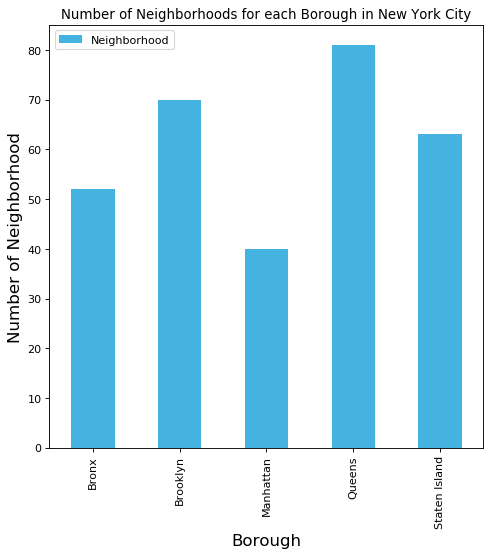

In [10]:

plt.figure(figsize=(7,7), dpi = 80)
# title
plt.title("Number of Neighborhoods for each Borough in New York City")
#On x-axis
plt.xlabel("Borough", fontsize = 15)
#On y-axis
plt.ylabel("Number of Neighborhood", fontsize=15)
#giving a bar plot
nyc.groupby("Borough")["Neighborhood"].count().plot(kind="bar", color="#45b3e0")
#legend
plt.legend()
#displays the plot
plt.show()

Create a function to retrieve latitude and longitude from given location name.

In [11]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Create a function to retrive venues from Foursquare API

In [67]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '5PW2QHZ2UPWOF0EA10APBKSVUPDTIRTCFYFOPXY5FLHUY5Q4' # your Foursquare ID
    CLIENT_SECRET = 'GGG1E1ROZBVAS2L0MQT1TRE2QYMBYUXT1CUTAEWDRUVYGDJ1' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    venue_data = requests.get(url).json()["response"]['groups'][0]['items']
#     venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            continue
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

def get_venue_details(venue_id):
        
    CLIENT_ID = '5PW2QHZ2UPWOF0EA10APBKSVUPDTIRTCFYFOPXY5FLHUY5Q4' # your Foursquare ID
    CLIENT_SECRET = 'GGG1E1ROZBVAS2L0MQT1TRE2QYMBYUXT1CUTAEWDRUVYGDJ1' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    venue_data = requests.get(url).json()['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [46]:
venues = get_venues(40.898273,-73.867315)
venues[venues["Category"]=="Chinese Restaurant"]

,ID,Name,Category


In [47]:
chn_res = venues[venues['Category']=='Chinese Restaurant'].values.tolist()
chn_res

[]

In [48]:
for row in nyc.values.tolist():
    print(row)

['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
['Bronx', 'Norwood', 40.87722415599446, -73.8793907395681]
['Bronx', 'Williamsbridge', 40.88103887819211, -73.85744642974207]
['Bronx', 'Baychester', 40.866858107252696, -73.83579759808117]
['Bronx', 'Pelham Parkway', 40.85741349808865, -73.85475564017999]
['Bronx', 'City Island', 40.84724670491813, -73.78648845267413]
['Bronx', 'Bedford Park', 40.870185164975325, -73.8855121841913]
['Bronx', 'University Heights', 40.85572707719664, -73.9104159619131]
['Bronx', 'Morris Heights', 40.847897926

In [54]:
# prepare neighborhood list that contains Chinese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
chinese_rest_ny=pd.DataFrame(columns=column_names)

print('Chinese restaurants in\n---------------------')
       
for row in nyc.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    chinese_resturants=venues[venues['Category']=='Chinese Restaurant']
    if len(chinese_resturants) > 0:
        print(Neighborhood+', '+Borough+' : '+str(len(chinese_resturants)))
    for restaurant_detail in chinese_resturants.values.tolist():
        id, name , category=restaurant_detail
        chinese_rest_ny = chinese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

print('Completed constructing the Chinese restaurants data set')

Chinese restaurants in
---------------------
Wakefield, Bronx : 1
Co-op City, Bronx : 1
Fieldston, Bronx : 1
Marble Hill, Manhattan : 1
Norwood, Bronx : 3
Baychester, Bronx : 2
Pelham Parkway, Bronx : 3
City Island, Bronx : 1
Bedford Park, Bronx : 2
University Heights, Bronx : 2
Morris Heights, Bronx : 4
Fordham, Bronx : 1
Melrose, Bronx : 3
Port Morris, Bronx : 2
Longwood, Bronx : 3
Hunts Point, Bronx : 1
Morrisania, Bronx : 1
Soundview, Bronx : 2
Country Club, Bronx : 1
Parkchester, Bronx : 3
Westchester Square, Bronx : 3
Morris Park, Bronx : 1
Spuyten Duyvil, Bronx : 1
North Riverdale, Bronx : 2
Castle Hill, Bronx : 1
Pelham Gardens, Bronx : 3
Concourse, Bronx : 3
Unionport, Bronx : 2
Edenwald, Bronx : 1
Bay Ridge, Brooklyn : 3
Bensonhurst, Brooklyn : 4
Sunset Park, Brooklyn : 5
Gravesend, Brooklyn : 3
Brighton Beach, Brooklyn : 1
Manhattan Terrace, Brooklyn : 1
Flatbush, Brooklyn : 1
Kensington, Brooklyn : 2
Windsor Terrace, Brooklyn : 2
Brownsville, Brooklyn : 1
Williamsburg, Broo

KeyError: 'groups'

In [55]:
chinese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Wakefield,4edbac4e775bcc53fc0ed5f8,Hong Kong China King
1,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet
2,Bronx,Fieldston,4cc4d337be40a35d390b814c,Lee's Chinese Kitchen
3,Manhattan,Marble Hill,4d965fd061a3a1cde4989a42,Lucky Star Chinese Restaurant
4,Bronx,Norwood,4e2e08021838f1c552b6b8eb,Choi Yuan - Chinese Restaurant


In [56]:
chinese_rest_ny.shape

(346, 4)

Construct a bar chart to visualize the Chinese restaurants in every Borough in NYC.

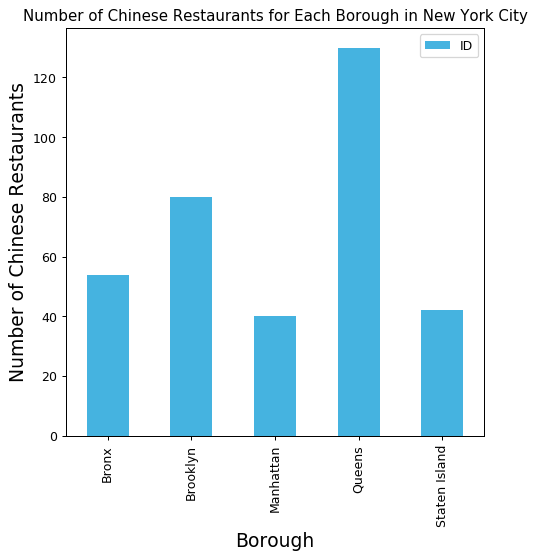

In [57]:
plt.figure(figsize=(6,6), dpi = 90)
# title
plt.title('Number of Chinese Restaurants for Each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Number of Chinese Restaurants', fontsize=15)
#giving a bar plot
chinese_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar', color='#45b3e0')
#legend
plt.legend()
#displays the plot
plt.show()

Visualize the Top 10 neighborhoods that enjoy Chinese food

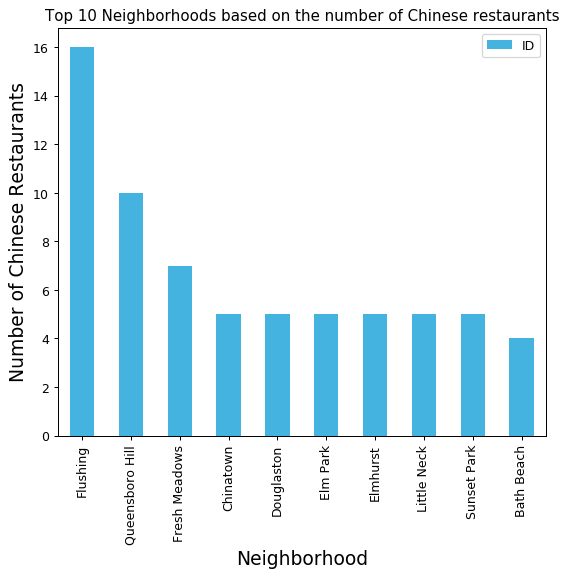

In [60]:
plt.figure(figsize=(7,6), dpi = 90)
# title
plt.title('Top 10 Neighborhoods based on the number of Chinese restaurants')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('Number of Chinese Restaurants', fontsize=15)
#giving a bar plot
chinese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar', color='#45b3e0')
#legend
plt.legend()
#displays the plot
plt.show()

We can tell that Flushing has the most number of Chinese restaurants.

In [61]:
chinese_rest_ny[chinese_rest_ny["Neighborhood"]=="Flushing"]

,Borough,Neighborhood,ID,Name
175,Queens,Flushing,5747a89b498ee4b7a5106556,DunHuang Lanzhou Beef Noodle
176,Queens,Flushing,4fa3f81be4b0a34ac673bf1e,Taipei Hong 台北夯
177,Queens,Flushing,52235ea211d2fe55782d764c,Dong Yi Feng
178,Queens,Flushing,4abfef82f964a520179320e3,New Imperial Palace 東湖
179,Queens,Flushing,4c78756397028cfaec16d8fe,New Golden Szechuan Chinese Restaurant
180,Queens,Flushing,4faff7eae4b03b8055801cde,Xi'an Famous Foods
181,Queens,Flushing,4d1bcddc1356224bc6410abe,OK Ryan
182,Queens,Flushing,4ad50f59f964a520950121e3,Fu Run 賦潤東北美食
183,Queens,Flushing,4ac38216f964a520929b20e3,Golden Shopping Mall
184,Queens,Flushing,4ef37491d3e32dc398c7c5c7,Laoma Mala Tang


Let's take a closer look at these Chinese restaurants using Foursquare API.

In [68]:
# prepare neighborhood list that contains Chiense restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in chinese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_rest_ny),')','processed')
    chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4edbac4e775bcc53fc0ed5f8
( 1 / 346 ) processed
                         ID            Name  Likes  Rating  Tips
0  4c66dcfaaebea593955a74d0  Chinese Buffet      7     5.2    10
( 2 / 346 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4cc4d337be40a35d390b814c
( 3 / 346 ) processed
                         ID                           Name  Likes  Rating  \
0  4d965fd061a3a1cde4989a42  Lucky Star Chinese Restaurant      3     7.3   

   Tips  
0     5  
( 4 / 346 ) processed
                         ID                            Name  Likes  Rating  \
0  4e2e08021838f1c552b6b8eb  Choi Yuan - Chinese Restaurant      6     6.8   

   Tips  
0     8  
( 5 / 346 ) processed
                         ID                          Name  Likes  Rating  Tips
0  4e4d0387bd413c4cc66dfd72  Hung Hing Chinese Restaurant      5     6.5     2
( 6 / 346 ) pr

KeyError: 'venue'

In [69]:
chinese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Wakefield,0,0,0,0,0
1,Bronx,Co-op City,4c66dcfaaebea593955a74d0,Chinese Buffet,7,5.2,10
2,Bronx,Fieldston,0,0,0,0,0
3,Manhattan,Marble Hill,4d965fd061a3a1cde4989a42,Lucky Star Chinese Restaurant,3,7.3,5
4,Bronx,Norwood,4e2e08021838f1c552b6b8eb,Choi Yuan - Chinese Restaurant,6,6.8,8


In [70]:
chinese_rest_stats_ny.shape

(277, 7)

In [71]:
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       277 non-null    object
 1   Neighborhood  277 non-null    object
 2   ID            277 non-null    object
 3   Name          277 non-null    object
 4   Likes         277 non-null    object
 5   Rating        277 non-null    object
 6   Tips          277 non-null    object
dtypes: object(7)
memory usage: 15.3+ KB


In [74]:
convert_types = { 'Likes': float, 'Rating': float, 'Tips': float }
chinese_rest_stats_ny = chinese_rest_stats_ny.astype(convert_types)
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       277 non-null    object 
 1   Neighborhood  277 non-null    object 
 2   ID            277 non-null    object 
 3   Name          277 non-null    object 
 4   Likes         277 non-null    float64
 5   Rating        277 non-null    float64
 6   Tips          277 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.3+ KB


Highest rating restaurant

In [75]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood             Windsor Terrace
ID              54e39b14498e9c646b42958e
Name                East Wind Snack Shop
Likes                                138
Rating                                 9
Tips                                  50
Name: 75, dtype: object

Most popular restaurant (with most likes)

In [76]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              4e3484038877beb5e9a22a0b
Name                          Café China
Likes                               1046
Rating                               8.6
Tips                                 273
Name: 144, dtype: object

Most critical restaurant (with most reviews/tips)

In [77]:
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              4e3484038877beb5e9a22a0b
Name                          Café China
Likes                               1046
Rating                               8.6
Tips                                 273
Name: 144, dtype: object

Find the average rating of Chinese restaurants among each neighborhood in NYC

In [78]:
ny_neighborhood_stats=chinese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [79]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
69,Lower East Side,9.00
110,South Side,8.90
87,North Side,8.90
55,Greenwich Village,8.90
38,East Village,8.90
65,Little Italy,8.75
121,Upper West Side,8.70
84,Murray Hill,8.65
118,Tribeca,8.60
77,Midtown,8.60


What about each Borough?

In [80]:
ny_borough_stats=chinese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [81]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.134286
1,Brooklyn,5.118056
3,Queens,4.612069
0,Bronx,1.611111


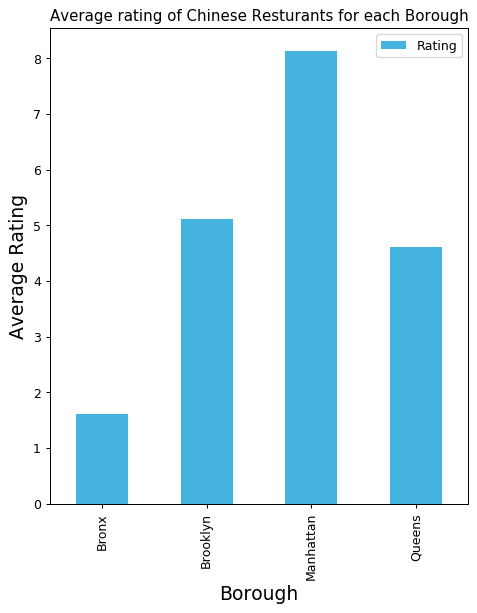

In [82]:
plt.figure(figsize=(6,7), dpi = 90)
# title
plt.title('Average rating of Chinese Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
chinese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color='#45b3e0')
#legend
plt.legend()
#displays the plot
plt.show()

Neighborhoods with highly rated Chinese resturants (average rating > 9)

In [83]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
69,Lower East Side,9.0


In [ ]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [ ]:
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='#EA1253',
            fill=True,
            fill_color='#12EA92',
            fill_opacity=0.4
        )
    )

In [ ]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [ ]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

In [ ]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=11)
ny_geo = r'geo-boundaries.json'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlGnBu',
    fill_opacity=0.6, 
    line_opacity=0.4,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('rated-map.html')

### 4. Conclusion
Based on the data analysis conducted above, we/Mr.Chan now have a better understanding about the distribution of Chinese restaurants in New York.
We know now that:
- Lower East Side has the best Chinese restaurants in NYC. It is a good idea to pay a visit to the local markets and explore how they are so successful.
- Bronx in general isn't so fond of Chinese food and Mr.Chan should be careful to choose the location 